<ipython-input-17-9a00cd64cdd5>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


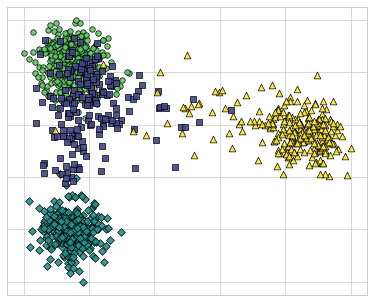

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pc1 = np.load("pc1.npy")
pc2 = np.load("pc2.npy")
superpopulation = pd.read_csv("superpop.csv")["0"]

pc1 -= pc1.min()
pc1 /= pc1.max()
pc2 -= pc2.min()
pc2 /= pc2.max()

cmap = plt.get_cmap("viridis")
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize = (5, 4))

markers = ["o", "D", "s", "^"]
sizes = np.array([10, 10, 10, 15]) * 2 * 1.5
edges = np.array([0.1, 0.1, 0.1, 0.1]) * 5 * 1.5
colors = [0.75, 0.5, 0.2, 1.0]

i = 0
for pop in superpopulation.unique():
    inds = superpopulation == pop
    ax.scatter(
        x = pc1[inds], 
        y = pc2[inds], 
        c = cmap(colors[i]),
        s = sizes[i],
        marker = markers[i],
        alpha = 0.9, 
        linewidth = edges[i],
        edgecolor = "black"
    )

    i += 1

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0)

plt.savefig(
    "./pca.png", 
    transparent = False, 
    bbox_inches = "tight", 
    pad_inches = 0,
    dpi = 300
)

plt.show()